In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Load data
col_names = [
    "age",
    "income",
    "home_ownership",
    "emp_length",
    "loan_intent",
    "loan_grade",
    "loan_amnt",
    "loan_int_rate",
    "loan_status",
    "loan_percent_income",
    "default_on_file",
    "cred_hist_length"
]
df = pd.read_csv("dataset_", skiprows=75 , names = col_names,  na_values=["?"])
df = df.dropna()

df.head()


,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,default_on_file,cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Basic overview
print(df.shape)
print(df.info())
print(df.describe())

(28638, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  28638 non-null  int64  
 1   income               28638 non-null  int64  
 2   home_ownership       28638 non-null  object 
 3   emp_length           28638 non-null  float64
 4   loan_intent          28638 non-null  object 
 5   loan_grade           28638 non-null  object 
 6   loan_amnt            28638 non-null  int64  
 7   loan_int_rate        28638 non-null  float64
 8   loan_status          28638 non-null  int64  
 9   loan_percent_income  28638 non-null  float64
 10  default_on_file      28638 non-null  object 
 11  cred_hist_length     28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB
None
                age        income    emp_length     loan_amnt  loan_int_rate  \
count  28638.000000  2.863800e+04  28

In [ ]:
# Class balance
print(df['default_on_file'].value_counts(normalize=True))

In [ ]:
# Missing values check
print(df.isnull().sum())

/tmp/ipython-input-268776788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default_on_file', data=df, palette='Set2')


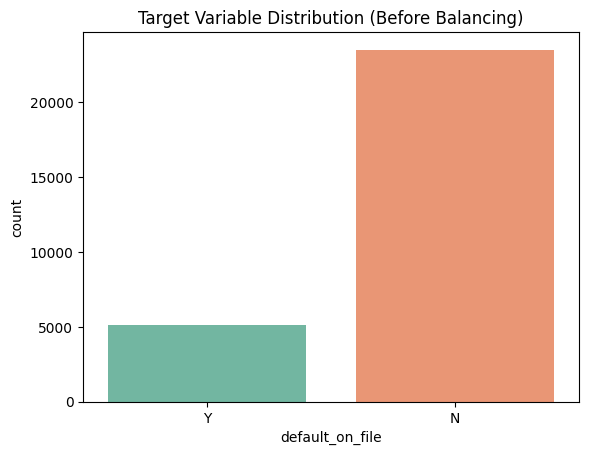

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='default_on_file', data=df, palette='Set2')
plt.title("Target Variable Distribution (Before Balancing)")
plt.show()

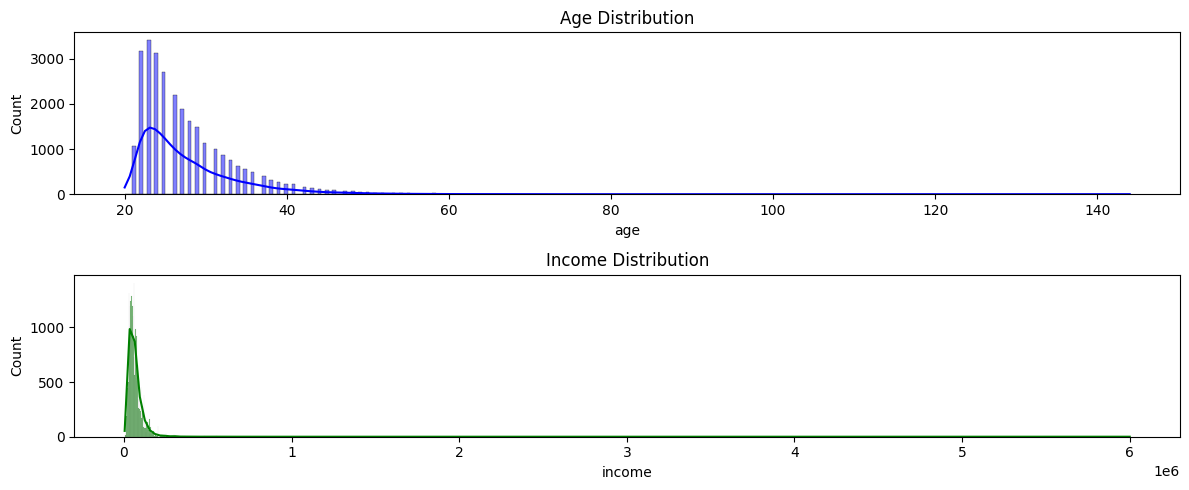

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
sns.histplot(df['age'], kde=True, ax=ax[0], color='blue')
ax[0].set_title("Age Distribution")

sns.histplot(df['income'], kde=True, ax=ax[1], color='green')
ax[1].set_title("Income Distribution")

plt.tight_layout()
plt.show()

Here we group the data by loan intent and calculate the mean default rate for each category. This tells us which loan purposes (e.g., education, medical, small business) have higher chances of default.

/tmp/ipython-input-3984283430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_intent', y='default_on_file', data=loan_intent_default, palette='coolwarm')


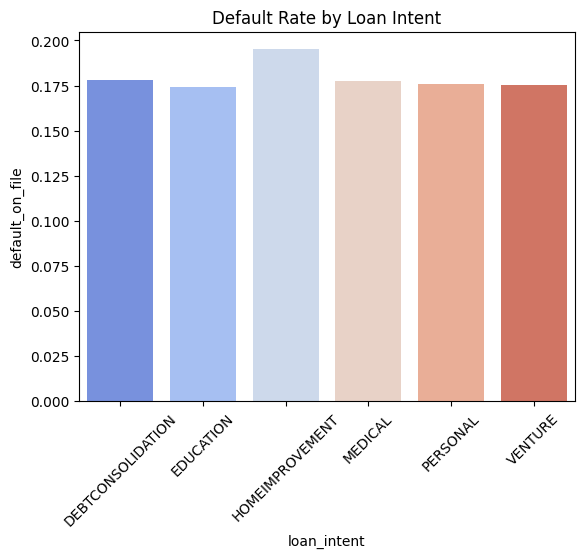

In [10]:
# Convert 'default_on_file' to numerical
df['default_on_file'] = df['default_on_file'].apply(lambda x: 1 if x == 'Y' else 0)

loan_intent_default = df.groupby('loan_intent')['default_on_file'].mean().reset_index()
sns.barplot(x='loan_intent', y='default_on_file', data=loan_intent_default, palette='coolwarm')
plt.title("Default Rate by Loan Intent")
plt.xticks(rotation=45)
plt.show()

A heatmap shows correlations between all numerical variables. Strong positive/negative correlations can reveal redundant features or hidden relationships.

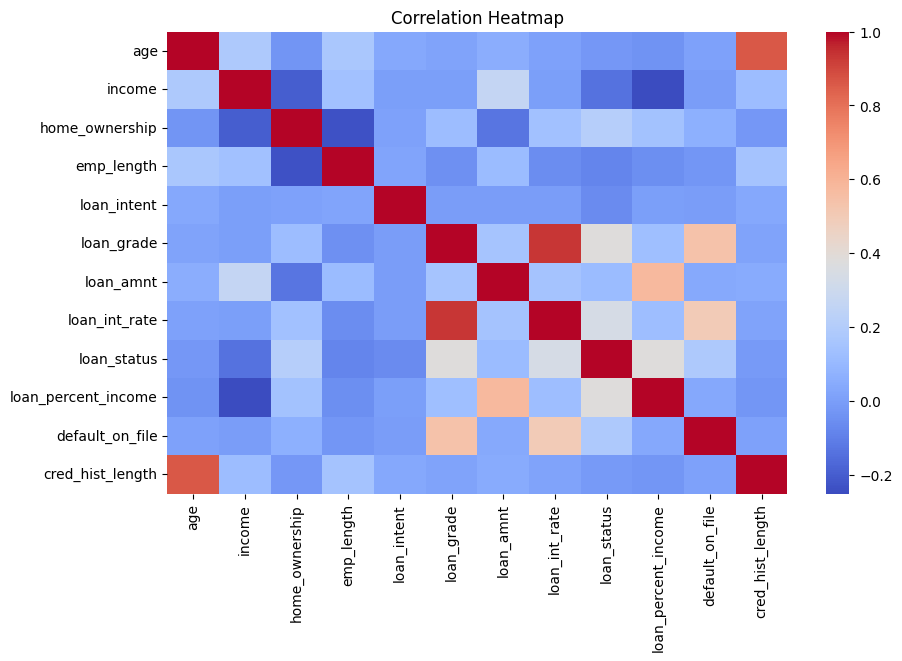

In [53]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

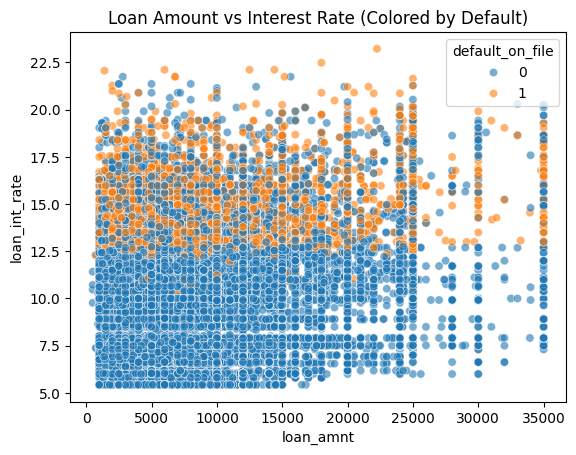

In [54]:
sns.scatterplot(x='loan_amnt', y='loan_int_rate', hue='default_on_file', data=df, alpha=0.6)
plt.title("Loan Amount vs Interest Rate (Colored by Default)")
plt.show()

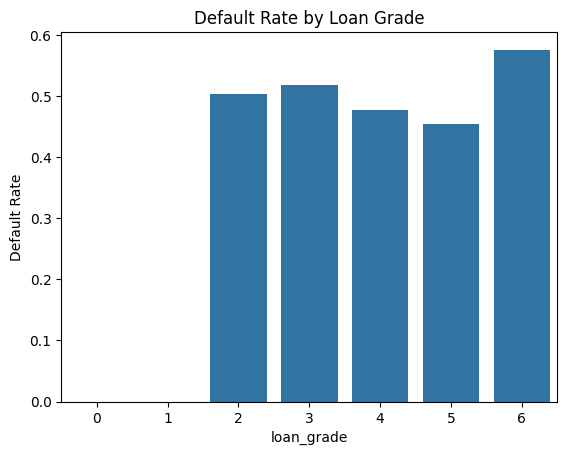

In [64]:
grade_risk = df.groupby('loan_grade')['default_on_file'].mean().reset_index()
sns.barplot(x='loan_grade', y='default_on_file', data=grade_risk)
plt.title("Default Rate by Loan Grade")
plt.ylabel("Default Rate")
plt.show()


In [11]:
numeric_cols = [
    "person_age", "person_income", "person_emp_length", "loan_amnt",
    "loan_int_rate", "loan_status", "loan_percent_income", "cred_hist_length"
]


cat_cols = ["home_ownership", "loan_intent", "loan_grade", "default_on_file"]


for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

In [12]:
# Split features and target
X = df.drop("default_on_file", axis=1)
y = df["default_on_file"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balance data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#

In [13]:
 #Scale
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      4707
           1       0.50      0.79      0.61      1021

    accuracy                           0.82      5728
   macro avg       0.72      0.81      0.75      5728
weighted avg       0.87      0.82      0.83      5728

AUC-ROC: 0.8917051458358953


We extract the feature importance from the trained Random Forest model. This reveals which features the model considers most predictive of default.

/tmp/ipython-input-4228387480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


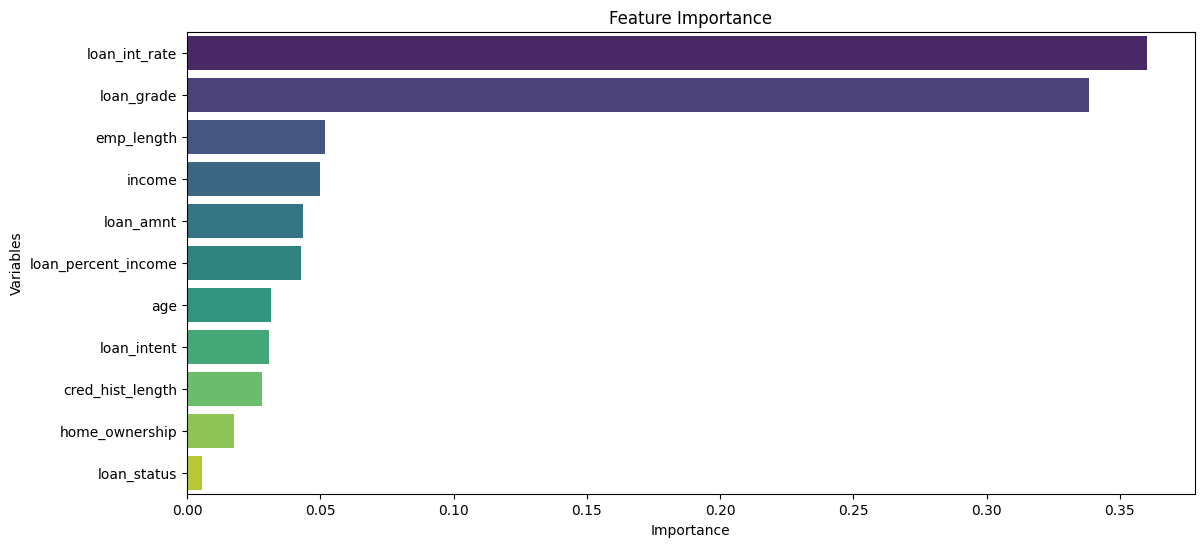

In [14]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(13,6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.ylabel('Variables')
plt.xlabel('Importance')
plt.title("Feature Importance")
plt.show()

 loan_int_rate and loan_percent_income rank highest, it means borrowers with high interest rates and high loan-to-income ratios are more likely to default. This aligns with standard credit risk theory.


